
#Crowdsourcing Short Squeeze Dashboard
#Author: Musfira Mubeen
#Project Overview

This project predicts whether a stock will go up (1) or down (0) the next day.
It includes steps like data exploration, feature creation, model training, tuning, and saving the final model.



#Import Libraries

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import  StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


#Load Data

In [2]:
from google.colab import files
files.upload()
df=pd.read_csv('/content/stock_features.csv')
print(df.head())


Saving stock_features.csv to stock_features.csv
         date  open_price  high_price   low_price  close_price       volume  \
0  2021-01-28  265.000000  483.000000  112.250000   193.600006   58815800.0   
1  2021-01-27  354.829987  380.000000  249.000000   347.510010   93396700.0   
2  2021-01-26   88.559998  150.000000   80.199997   147.979996  178588000.0   
3  2021-01-25   96.730003  159.179993   61.130001    76.790001  177874000.0   
4  2021-01-22   42.590000   76.760002   42.320000    65.010002  196784300.0   

   adjclose_price  daily_return_pct  price_range   avg_price        MA10  \
0      193.600006        -26.943394   370.750000  361.800003  193.600006   
1      347.510010         -2.062953   131.000000  528.584991  347.510010   
2      147.979996         67.095754    69.800003  162.549995  147.979996   
3       76.790001        -20.614082    98.049992  135.125004   76.790001   
4       65.010002         52.641470    34.440002   75.095001   65.010002   

         MA50       

In [3]:
df.drop('date',axis=1,inplace=True)

#Machine Learning

In [8]:
#Split features and target
x=df.drop(['target_updown'],axis=1)
y=df['target_updown']

In [9]:
# Split dataset into training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
models={
    'LogisticRegression': LogisticRegression(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'SVM': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    "Naive Bayas": GaussianNB()

}
Result={}
for name , model in models.items():
  model.fit(x_train,y_train)
  result=model.score(x_test,y_test)
  Result[name]=result
  print(f"{name} : {result}")


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression : 0.86282722513089
DecisionTreeClassifier : 0.8198952879581152
RandomForestClassifier : 0.8722513089005236
GradientBoostingClassifier : 0.8890052356020942
SVM : 0.506806282722513
KNeighborsClassifier : 0.5099476439790576
Naive Bayas : 0.48795811518324606


In [11]:
#pipeline
#preprocessing
standard=['open_price', 'high_price', 'low_price', 'close_price', 'adjclose_price', 'avg_price', 'MA10', 'MA50', 'VWAP', 'daily_return_pct', 'price_range']
minmax=['volume']
preprocessing=ColumnTransformer(transformers=[
    ('standard',StandardScaler(),standard),
    ('minmax',MinMaxScaler(),minmax)
], remainder='passthrough'
)
pipeline=Pipeline(steps=[
    ('preprocessing',preprocessing),
    ('Model',GradientBoostingClassifier(random_state=42))
])
pipeline.fit(x_train,y_train)
y_pred=pipeline.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,y_pred)}")
print(f"Confusion Matrix: {confusion_matrix(y_test,y_pred)}")
print(f"Classification Report: {classification_report(y_test,y_pred)}")




Accuracy Score: 0.8890052356020942
Confusion Matrix: [[439  54]
 [ 52 410]]
Classification Report:               precision    recall  f1-score   support

           0       0.89      0.89      0.89       493
           1       0.88      0.89      0.89       462

    accuracy                           0.89       955
   macro avg       0.89      0.89      0.89       955
weighted avg       0.89      0.89      0.89       955



In [14]:
#Hyperparameter Tuning
param_grid={
    'Model__n_estimators': [50, 100, 150, 200],
    'Model__learning_rate': [0.01, 0.05, 0.1],
    'Model__max_depth': [3, 5, 7]

}
grid=GridSearchCV(pipeline,param_grid,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)
print(f"Best Parameters: {grid.best_params_}")
print(f"Best Score: {grid.best_score_}")


Best Parameters: {'Model__learning_rate': 0.01, 'Model__max_depth': 3, 'Model__n_estimators': 50}
Best Score: 0.8779463127774767


Accuracy Score: 0.8869109947643979
Confusion Matrix: [[440  53]
 [ 55 407]]
Classification Report:               precision    recall  f1-score   support

           0       0.89      0.89      0.89       493
           1       0.88      0.88      0.88       462

    accuracy                           0.89       955
   macro avg       0.89      0.89      0.89       955
weighted avg       0.89      0.89      0.89       955



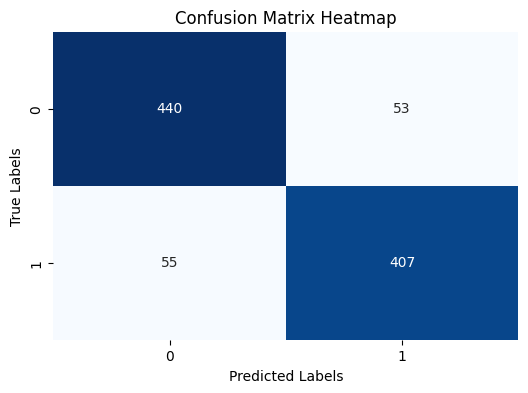

In [24]:
best_model=grid.best_estimator_
y_pred=best_model.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,y_pred)}")
print(f"Confusion Matrix: {confusion_matrix(y_test,y_pred)}")
print(f"Classification Report: {classification_report(y_test,y_pred)}")
cm = confusion_matrix(y_test, y_pred)
# Plot Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()




In [17]:
#Cross Validation
scores=cross_val_score(best_model,x_train,y_train,cv=5,scoring='accuracy')
print(f"Cross Validation Scores: {scores}")
print(f"Mean CV Accuracy: {scores.mean()}")
print(f"Standard Deviation: {scores.std()}")

Cross Validation Scores: [0.87303665 0.87172775 0.89005236 0.87418087 0.88073394]
Mean CV Accuracy: 0.8779463127774767
Standard Deviation: 0.0068011926700683005


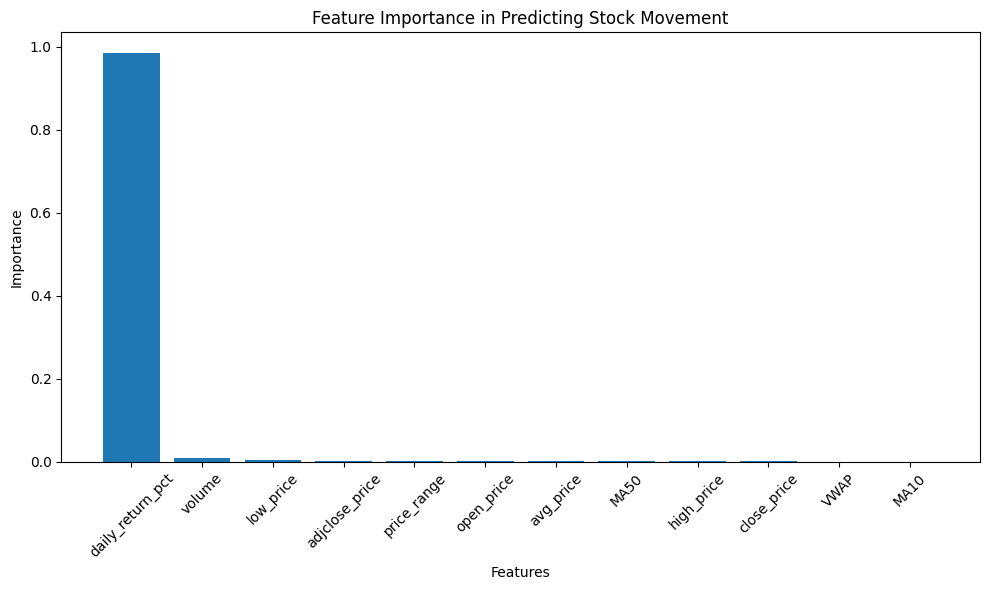

In [19]:
#Feature Importance
best_model = grid.best_estimator_
gb_model = best_model.named_steps['Model']
feature_names = standard + minmax
import matplotlib.pyplot as plt
import numpy as np

# Get importance values
importances = gb_model.feature_importances_

# Sort in descending order for clarity
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10,6))
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Predicting Stock Movement')
plt.tight_layout()
plt.show()


In [21]:
#save train model
joblib.dump(best_model,'final_stock_model.pkl')
print("Model Saved as final_stock_model.pkl")

Model Saved as final_stock_model.pkl


In [22]:
#Load saved model for prediction
model=joblib.load('final_stock_model.pkl')
pred=model.predict(x_test[:5])
print(f"Prediction: {pred}")

Prediction: [1 1 0 1 0]


#Final Notes
This project shows a complete machine learning workflow for stock movement prediction.
The tuned Gradient Boosting model gave strong and stable results.
It’s ready for deployment or further improvement with real-time data.